In [1]:
from moviepy.editor import *

import numpy as np
import matplotlib.pyplot as plt
import os
from moviepy.video.fx.all import crop
import math

from moviepy.editor import VideoFileClip, concatenate_videoclips

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Utils ============================================================================

In [2]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# INPUT NORMALIZATION ============================================================================
### Clap finding, separated audio normalization, ratio fixing, resizing, saving

In [ ]:
input_folder_path = "input/"
norm_folder_path = "norm_input/"
FPS = 44100

for filename in os.listdir(input_folder_path):

    clip = VideoFileClip(input_folder_path + filename)

    clip = clip.fx(afx.audio_normalize)

   

    soundarray = clip.audio.to_soundarray(fps=FPS)

    soundarray_normalized = np.mean(np.abs(soundarray), axis=1)

    soundarray_smoothed = moving_average(soundarray_normalized)

    for frame in range(len(soundarray_smoothed)):
        if soundarray_smoothed[frame] > 0.15:
            break


    frame_clap = np.argmax(soundarray_smoothed[frame-500:frame+FPS]) + frame - 500

    del(soundarray)
    del(soundarray_normalized)
    del(soundarray_smoothed)

    t_clap = frame_clap / FPS

    clap = clip.subclip(cvsecs(t_clap-1),cvsecs(t_clap+1)) #cvsecs(clip.duration))
    song = clip.subclip(cvsecs(t_clap+1), cvsecs(clip.duration))
    
    clap = clap.fx(afx.audio_normalize)
    song = song.fx(afx.audio_normalize)
    
    clip = concatenate_videoclips([clap, song])

    old_width = clip.size[0]
    old_height = clip.size[1]
    clip_ratio = old_width / old_height
    
    if clip_ratio < 1.65:
        new_height = math.floor(clip.size[0] / 1.777)
        height_to_be_cropped = math.floor((old_height - new_height) / 2)
        clip = crop(clip,   x1=0,
                            y1=height_to_be_cropped,
                            x2=old_width, 
                            y2=height_to_be_cropped+new_height)
    
    clip = clip.resize( (480,270) )
    
    clip.write_videofile(norm_folder_path + ".".join(filename.split(".")[:-1]) + ".mp4")
    
    del(clip)
    
    #break

# PREVIEW AND DELAY CONTROL ============================================================================
### composite video  creation, sync correction, saving

In [3]:
input_folder_path = "norm_input/"
output_folder_path = "output/"
FPS = 44100
from moviepy.editor import VideoFileClip, clips_array, vfx

clips = []
for filename in os.listdir(input_folder_path):
    clips.append(VideoFileClip(input_folder_path + filename))

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [60]:
delay_controls = [widgets.FloatSlider(
    value=0.0, min=-.5, max=.5, step=0.025,
    description='Sync ' + str(((i % 4),(i // 4))) + ':',
    readout_format='.3f',
) for i in range(16)]

volume_controls = [widgets.FloatSlider(
    value=1.0, min=0.0, max=1.0, step=0.25,
    description='Vol.' + str(((i % 4),(i // 4))) + ':',
    readout_format='.2f',
) for i in range(len(clips))]

controls = sum([[delay_controls[i], volume_controls[i]] for i in range(len(clips))], [])

In [64]:
widgets.HBox([widgets.VBox([controls[i] for i in range(len(controls)) if ((i % 8 == 0) | (i % 8 == 1))]), 
              widgets.VBox([controls[i] for i in range(len(controls)) if ((i % 8 == 2) | (i % 8 == 3))]),
              widgets.VBox([controls[i] for i in range(len(controls)) if ((i % 8 == 4) | (i % 8 == 5))]),
              widgets.VBox([controls[i] for i in range(len(controls)) if ((i % 8 == 6) | (i % 8 == 7))]),
             ])

In [67]:
video = CompositeVideoClip([clips[i].set_start(0.5+delay_controls[i].value).volumex(volume_controls[i].value).fx(vfx.colorx, (.1 + .9*volume_controls[i].value)).set_position((480*(i % 4),270*(i // 4))) for i in range(len(clips))], size=(1920,1080))
video.subclip(cvsecs(0),cvsecs(2.5)).ipython_display(width=1920, maxduration=10000)

chunk:  41%|████      | 23/56 [00:00<00:00, 226.29it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in %s


t:   2%|▏         | 3/150 [00:00<00:05, 27.27it/s, now=None]     

MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


# Output ============================================================================
### Write to file

In [49]:
video = CompositeVideoClip([clips[i].set_start(0.5+delay_controls[i].value).volumex(volume_controls[i].value).set_position((480*(i % 4),270*(i // 4))) for i in range(len(clips))], size=(1920,1080))
video.write_videofile(output_folder_path + "final.mp4")

# @@@@@@@@@@@@@@@@@@@@@
# OLD @@@@@@@@@@@@@@@@@@@@@
# @@@@@@@@@@@@@@@@@@@@@

clip.ipython_display(width=400, maxduration=10000)

In [6]:
teste = concatenate_videoclips(clips)

In [12]:
clip.ipython_display(width=400, maxduration=10000)

chunk:   0%|          | 0/464 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in %s


t:   0%|          | 3/1259 [00:00<01:07, 18.52it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


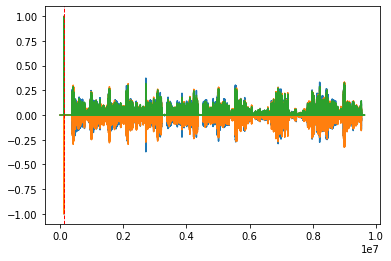

In [7]:
plt.plot(soundarray)
plt.plot(soundarray_smoothed)
#plt.plot(bla[100000:114000])
plt.axvline(frame_clap, c="red", lw=1, ls="--")

In [8]:
soundarray = clip.audio.to_soundarray(fps=FPS)

soundarray_normalized = np.mean(np.abs(soundarray), axis=1)

soundarray_smoothed = moving_average(soundarray_normalized)

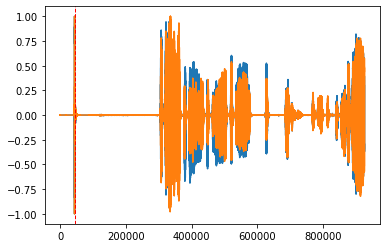

In [11]:
plt.plot(soundarray)
#plt.plot(soundarray_smoothed)
#plt.plot(bla[100000:114000])
plt.axvline(44100, c="red", lw=1, ls="--")

In [ ]:
plt.plot(soundarray)
plt.plot(soundarray_smoothed)
plt.axvline(frame_clap, c="red", lw=1, ls="--")

In [ ]:
plt.plot(soundarray[frame-1500:frame+1500])
#plt.plot(blo[t-1500:t+1500])
plt.axvline(1500, c="red", lw=1, ls="--")

In [ ]:
del(soundarray)
del(soundarray_normalized)
del(soundarray_smoothed)

In [ ]:
#clip = clip.resize( (10,90) )
clip = clip.crop(x_center=300, width=400, y1=100, y2=600)
clip = clip.fx(afx.audio_normalize)

In [ ]:
clip.write_videofile(".".join(filename.split(".")[:-1]) + ".mp4")

In [ ]:
from moviepy.video.fx.all import crop

In [ ]:
originalClip = (VideoFileClip(filename)
    .subclip((1,00.00),(1,03.00)))

(w, h) = originalClip.size

cropClip = fx.all.crop(clip2, width=h, height=h, x_center=w/2, y_center=h/2)